In [337]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from scipy.stats import shapiro
from scipy.stats import kruskal
from scipy.stats import chi2_contingency
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

In [2]:
SR = pd.read_csv(r"C:\Users\eadam\Desktop\DSC 680\Weeks 5 - 8\Sports Reference.csv")

## Segmenting the Data

### Creating a dataframe of teams that have qualified for the NCAA Tournament in the last 30 years.

In [3]:
SR_NCAA = SR.loc[SR['NCAA'] == 1]

In [4]:
SR_NCAA.dropna(inplace=True)

<ipython-input-4-a96d202128c2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SR_NCAA.dropna(inplace=True)


In [5]:
SR_NCAA.isna().sum()

School             0
Win                0
NCAA               0
Year               0
G                  0
W                  0
L                  0
W-L%               0
SRS                0
SOS                0
Conf. W            0
Conf. L            0
Home W             0
Home L             0
Away W             0
Away L             0
Team Points        0
Opponent Points    0
FG                 0
FGA                0
FG%                0
3P                 0
3PA                0
3P%                0
FT                 0
FTA                0
FT%                0
ORB                0
TRB                0
AST                0
STL                0
BLK                0
TOV                0
dtype: int64

In [99]:
SR_NCAA = SR_NCAA.drop(['SRS', 'SOS'], axis=1)

In [100]:
SR_NCAA.head(20)

,School,Win,NCAA,Year,G,W,L,W-L%,Conf. W,Conf. L,Home W,Home L,Away W,Away L,Team Points,Opponent Points,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,TRB,AST,STL,BLK,TOV
957,Arizona,1.0,1,1997,34,25,9,0.735,11.0,7.0,13.0,1.0,3.0,6.0,2850.0,2491.0,1015.0,2241.0,0.453,222.0,600.0,0.370,598.0,913.0,0.655,562.0,1377.0,567.0,358.0,100.0,521.0
968,Boston College,0.0,1,1997,31,22,9,0.710,12.0,6.0,12.0,2.0,6.0,5.0,2305.0,2143.0,780.0,1724.0,0.452,190.0,512.0,0.371,555.0,790.0,0.703,430.0,1194.0,408.0,240.0,87.0,473.0
969,Boston University,0.0,1,1997,30,25,5,0.833,17.0,1.0,10.0,0.0,11.0,4.0,2020.0,1859.0,725.0,1676.0,0.433,166.0,555.0,0.299,404.0,600.0,0.673,318.0,1105.0,446.0,227.0,136.0,431.0
976,Butler,0.0,1,1997,33,23,10,0.697,12.0,4.0,11.0,1.0,8.0,7.0,2297.0,2004.0,763.0,1702.0,0.448,169.0,464.0,0.364,602.0,901.0,0.668,386.0,1186.0,432.0,210.0,123.0,480.0
980,California,0.0,1,1997,32,23,9,0.719,12.0,6.0,12.0,1.0,4.0,6.0,2402.0,2171.0,871.0,1905.0,0.457,142.0,436.0,0.326,518.0,771.0,0.672,450.0,1216.0,520.0,271.0,135.0,526.0
987,Charleston Southern,0.0,1,1997,30,17,13,0.567,7.0,7.0,8.0,4.0,7.0,7.0,2151.0,2102.0,739.0,1730.0,0.427,199.0,570.0,0.349,474.0,681.0,0.696,349.0,1077.0,466.0,226.0,91.0,428.0
988,Charlotte,0.0,1,1997,31,22,9,0.710,10.0,4.0,10.0,4.0,9.0,3.0,2217.0,2044.0,768.0,1838.0,0.418,182.0,532.0,0.342,499.0,677.0,0.737,442.0,1181.0,441.0,211.0,118.0,396.0
989,Chattanooga,0.0,1,1997,35,24,11,0.686,11.0,3.0,14.0,2.0,5.0,6.0,2680.0,2281.0,942.0,2034.0,0.463,217.0,650.0,0.334,579.0,839.0,0.690,535.0,1351.0,532.0,288.0,83.0,492.0
991,Cincinnati,0.0,1,1997,34,26,8,0.765,12.0,2.0,13.0,3.0,8.0,2.0,2743.0,2226.0,962.0,1938.0,0.496,184.0,555.0,0.332,635.0,924.0,0.687,514.0,1357.0,525.0,264.0,100.0,523.0
992,Clemson,0.0,1,1997,33,23,10,0.697,9.0,7.0,12.0,3.0,6.0,4.0,2249.0,2028.0,774.0,1746.0,0.443,158.0,509.0,0.310,543.0,799.0,0.680,431.0,1155.0,458.0,228.0,85.0,422.0


In [6]:
pd.set_option("display.max_rows", None)

In [7]:
pd.set_option("display.max_columns", None)

In [8]:
SR_NCAA['School'].value_counts()

Kansas                       25
Michigan State               24
Duke                         24
Gonzaga                      23
Wisconsin                    23
Kentucky                     22
North Carolina               21
Arizona                      21
Texas                        20
UCLA                         19
Xavier                       18
Purdue                       18
Connecticut                  17
Villanova                    17
Cincinnati                   17
Louisville                   17
Oklahoma                     17
Maryland                     17
Florida                      17
Syracuse                     17
Ohio State                   16
Illinois                     16
Indiana                      16
Tennessee                    15
Oklahoma State               15
Marquette                    14
Butler                       14
Creighton                    14
Pittsburgh                   14
Temple                       13
Notre Dame                   13
West Vir

### Creating a dataframe for teams that have won the NCAA Tournament in the last 30 years.

In [9]:
SR_NCAA_Wins = SR_NCAA.loc[SR_NCAA['Win'] == 1]

In [10]:
SR_NCAA_Wins

,School,Win,NCAA,Year,G,W,L,W-L%,SRS,SOS,Conf. W,Conf. L,Home W,Home L,Away W,Away L,Team Points,Opponent Points,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,TRB,AST,STL,BLK,TOV
957,Arizona,1.0,1,1997,34,25,9,0.735,21.66,11.04,11.0,7.0,13.0,1.0,3.0,6.0,2850.0,2491.0,1015.0,2241.0,0.453,222.0,600.0,0.370,598.0,913.0,0.655,562.0,1377.0,567.0,358.0,100.0,521.0
1375,Kentucky,1.0,1,1998,39,35,4,0.897,22.95,9.85,14.0,2.0,9.0,3.0,11.0,0.0,3123.0,2612.0,1161.0,2409.0,0.482,250.0,681.0,0.367,551.0,816.0,0.675,587.0,1640.0,691.0,341.0,240.0,583.0
1616,Connecticut,1.0,1,1999,36,34,2,0.944,24.73,8.79,16.0,2.0,13.0,2.0,12.0,0.0,2781.0,2207.0,986.0,2111.0,0.467,174.0,506.0,0.344,635.0,868.0,0.732,503.0,1451.0,551.0,287.0,151.0,523.0
2033,Michigan State,1.0,1,2000,39,32,7,0.821,25.04,9.91,13.0,3.0,14.0,0.0,6.0,6.0,2889.0,2299.0,1018.0,2148.0,0.474,253.0,669.0,0.378,600.0,816.0,0.735,521.0,1521.0,602.0,256.0,105.0,569.0
2261,Duke,1.0,1,2001,39,35,4,0.897,32.18,11.98,13.0,3.0,13.0,2.0,9.0,1.0,3538.0,2750.0,1217.0,2530.0,0.481,407.0,1057.0,0.385,697.0,1002.0,0.696,538.0,1505.0,701.0,411.0,196.0,531.0
2660,Maryland,1.0,1,2002,36,32,4,0.889,23.46,9.35,15.0,1.0,15.0,0.0,7.0,2.0,3060.0,2552.0,1083.0,2248.0,0.482,217.0,580.0,0.374,677.0,933.0,0.726,473.0,1479.0,714.0,302.0,216.0,495.0
3098,Syracuse,1.0,1,2003,35,30,5,0.857,19.02,9.02,13.0,3.0,17.0,0.0,6.0,3.0,2785.0,2435.0,1020.0,2146.0,0.475,186.0,540.0,0.344,559.0,806.0,0.694,478.0,1425.0,523.0,298.0,247.0,494.0
3215,Connecticut,1.0,1,2004,39,33,6,0.846,22.64,7.77,12.0,4.0,17.0,1.0,6.0,4.0,3073.0,2493.0,1154.0,2403.0,0.480,249.0,619.0,0.402,516.0,828.0,0.623,586.0,1742.0,681.0,233.0,315.0,532.0
3676,North Carolina,1.0,1,2005,37,33,4,0.892,28.42,10.66,14.0,2.0,15.0,0.0,8.0,2.0,3257.0,2600.0,1128.0,2260.0,0.499,277.0,687.0,0.403,724.0,998.0,0.725,502.0,1499.0,706.0,362.0,142.0,594.0
3897,Florida,1.0,1,2006,39,33,6,0.846,20.21,5.49,10.0,6.0,16.0,2.0,6.0,4.0,3052.0,2478.0,1061.0,2120.0,0.500,289.0,738.0,0.392,641.0,862.0,0.744,421.0,1402.0,650.0,297.0,207.0,561.0


In [11]:
SR_NCAA_Wins['School'].value_counts()

Connecticut       5
North Carolina    3
Duke              3
Kentucky          2
Kansas            2
Florida           2
Michigan State    1
Arizona           1
Maryland          1
Louisville        1
Villanova         1
Baylor            1
Syracuse          1
Virginia          1
Name: School, dtype: int64

In [12]:
SR_NCAA_Wins_Combined = SR_NCAA_Wins.groupby(['School']).mean()

### Creating a dataframe for teams designated as 'Blue Bloods', or teams that are considered by many to be an elite class of college basketball programs.

In [51]:
BlueBloods = ['Duke', 'North Carolina', 'Kansas', 'Kentucky']

In [52]:
BB_NCAA = SR_NCAA[SR_NCAA['School'].isin(BlueBloods)]
BB_NCAA

,School,Win,NCAA,Year,G,W,L,W-L%,SRS,SOS,Conf. W,Conf. L,Home W,Home L,Away W,Away L,Team Points,Opponent Points,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,TRB,AST,STL,BLK,TOV
1013,Duke,0.0,1,1997,33,24,9,0.727,22.52,9.06,12.0,4.0,15.0,2.0,7.0,4.0,2629.0,2185.0,895.0,1938.0,0.462,278.0,714.0,0.389,561.0,801.0,0.700,417.0,1117.0,473.0,280.0,131.0,423.0
1064,Kansas,0.0,1,1997,36,34,2,0.944,26.60,7.94,15.0,1.0,15.0,0.0,10.0,1.0,3058.0,2380.0,1084.0,2222.0,0.488,192.0,506.0,0.379,698.0,1007.0,0.693,556.0,1532.0,598.0,351.0,222.0,571.0
1068,Kentucky,0.0,1,1997,40,35,5,0.875,29.29,9.26,13.0,3.0,12.0,1.0,7.0,2.0,3325.0,2512.0,1238.0,2631.0,0.471,287.0,777.0,0.369,562.0,824.0,0.682,641.0,1575.0,776.0,480.0,203.0,589.0
1127,North Carolina,0.0,1,1997,35,28,7,0.800,21.23,12.00,11.0,5.0,14.0,1.0,6.0,4.0,2709.0,2334.0,1018.0,2124.0,0.479,188.0,506.0,0.372,485.0,713.0,0.680,528.0,1455.0,632.0,261.0,142.0,495.0
1320,Duke,0.0,1,1998,36,32,4,0.889,29.55,9.32,15.0,1.0,15.0,0.0,10.0,2.0,3082.0,2308.0,1081.0,2278.0,0.475,273.0,739.0,0.369,647.0,960.0,0.674,534.0,1377.0,514.0,339.0,183.0,448.0
1371,Kansas,0.0,1,1998,39,35,4,0.897,22.83,6.51,15.0,1.0,16.0,0.0,8.0,2.0,3300.0,2628.0,1249.0,2536.0,0.493,229.0,610.0,0.375,573.0,842.0,0.681,604.0,1682.0,746.0,315.0,220.0,623.0
1375,Kentucky,1.0,1,1998,39,35,4,0.897,22.95,9.85,14.0,2.0,9.0,3.0,11.0,0.0,3123.0,2612.0,1161.0,2409.0,0.482,250.0,681.0,0.367,551.0,816.0,0.675,587.0,1640.0,691.0,341.0,240.0,583.0
1435,North Carolina,0.0,1,1998,38,34,4,0.895,26.67,10.38,13.0,3.0,13.0,1.0,9.0,2.0,3113.0,2494.0,1131.0,2184.0,0.518,185.0,511.0,0.362,666.0,937.0,0.711,490.0,1512.0,699.0,259.0,188.0,493.0
1630,Duke,0.0,1,1999,39,37,2,0.949,34.79,10.12,16.0,0.0,14.0,0.0,9.0,0.0,3581.0,2619.0,1244.0,2422.0,0.514,293.0,739.0,0.396,800.0,1135.0,0.705,587.0,1645.0,633.0,349.0,245.0,572.0
1682,Kansas,0.0,1,1999,33,23,10,0.697,16.30,9.17,11.0,5.0,10.0,3.0,6.0,5.0,2380.0,2128.0,874.0,1951.0,0.448,165.0,483.0,0.342,467.0,708.0,0.660,461.0,1350.0,521.0,265.0,142.0,516.0


In [53]:
BB_NCAA_Combined = BB_NCAA.groupby(['School']).mean()

In [54]:
BB_NCAA_Combined.round(3)

,Win,NCAA,Year,G,W,L,W-L%,SRS,SOS,Conf. W,Conf. L,Home W,Home L,Away W,Away L,Team Points,Opponent Points,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,TRB,AST,STL,BLK,TOV
School,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Duke,0.125,1.0,2008.792,36.083,29.708,6.375,0.821,23.336,9.477,13.000,3.833,14.875,1.167,6.667,3.167,2923.708,2415.000,1011.792,2146.167,0.471,286.875,768.542,0.374,613.333,852.125,0.721,446.042,1333.292,531.417,287.917,172.875,450.875
Kansas,0.080,1.0,2009.280,35.840,29.200,6.640,0.811,21.246,9.588,13.600,3.200,15.120,0.760,6.920,3.440,2822.920,2379.640,1023.800,2129.000,0.480,226.560,610.080,0.371,548.680,789.760,0.695,450.040,1414.560,594.640,279.600,182.320,504.960
Kentucky,0.091,1.0,2008.591,35.955,28.273,7.682,0.781,20.317,9.375,12.955,3.682,14.182,1.500,6.273,3.636,2745.773,2338.182,986.773,2103.045,0.469,227.818,650.045,0.350,544.409,784.636,0.694,469.500,1380.682,534.864,251.000,190.545,473.318
North Carolina,0.143,1.0,2009.238,36.000,28.000,8.000,0.773,20.815,10.005,12.429,4.333,13.524,1.905,7.238,3.667,2912.190,2508.952,1056.905,2235.000,0.473,218.238,607.857,0.358,580.048,821.762,0.705,501.667,1474.952,621.667,262.524,159.286,486.238


### Creating a dataframe for teams that have not won the NCAA Tournament in the last 30 years.

In [13]:
SR_NCAA_Losses = SR_NCAA.loc[SR_NCAA['Win'] == 0]

In [14]:
SR_NCAA_Losses

,School,Win,NCAA,Year,G,W,L,W-L%,SRS,SOS,Conf. W,Conf. L,Home W,Home L,Away W,Away L,Team Points,Opponent Points,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,TRB,AST,STL,BLK,TOV
968,Boston College,0.0,1,1997,31,22,9,0.710,11.92,6.69,12.0,6.0,12.0,2.0,6.0,5.0,2305.0,2143.0,780.0,1724.0,0.452,190.0,512.0,0.371,555.0,790.0,0.703,430.0,1194.0,408.0,240.0,87.0,473.0
969,Boston University,0.0,1,1997,30,25,5,0.833,2.51,-2.86,17.0,1.0,10.0,0.0,11.0,4.0,2020.0,1859.0,725.0,1676.0,0.433,166.0,555.0,0.299,404.0,600.0,0.673,318.0,1105.0,446.0,227.0,136.0,431.0
976,Butler,0.0,1,1997,33,23,10,0.697,7.61,-0.16,12.0,4.0,11.0,1.0,8.0,7.0,2297.0,2004.0,763.0,1702.0,0.448,169.0,464.0,0.364,602.0,901.0,0.668,386.0,1186.0,432.0,210.0,123.0,480.0
980,California,0.0,1,1997,32,23,9,0.719,17.34,10.12,12.0,6.0,12.0,1.0,4.0,6.0,2402.0,2171.0,871.0,1905.0,0.457,142.0,436.0,0.326,518.0,771.0,0.672,450.0,1216.0,520.0,271.0,135.0,526.0
987,Charleston Southern,0.0,1,1997,30,17,13,0.567,-6.92,-6.56,7.0,7.0,8.0,4.0,7.0,7.0,2151.0,2102.0,739.0,1730.0,0.427,199.0,570.0,0.349,474.0,681.0,0.696,349.0,1077.0,466.0,226.0,91.0,428.0
988,Charlotte,0.0,1,1997,31,22,9,0.710,10.83,5.25,10.0,4.0,10.0,4.0,9.0,3.0,2217.0,2044.0,768.0,1838.0,0.418,182.0,532.0,0.342,499.0,677.0,0.737,442.0,1181.0,441.0,211.0,118.0,396.0
989,Chattanooga,0.0,1,1997,35,24,11,0.686,2.59,-5.22,11.0,3.0,14.0,2.0,5.0,6.0,2680.0,2281.0,942.0,2034.0,0.463,217.0,650.0,0.334,579.0,839.0,0.690,535.0,1351.0,532.0,288.0,83.0,492.0
991,Cincinnati,0.0,1,1997,34,26,8,0.765,20.71,5.51,12.0,2.0,13.0,3.0,8.0,2.0,2743.0,2226.0,962.0,1938.0,0.496,184.0,555.0,0.332,635.0,924.0,0.687,514.0,1357.0,525.0,264.0,100.0,523.0
992,Clemson,0.0,1,1997,33,23,10,0.697,17.23,10.53,9.0,7.0,12.0,3.0,6.0,4.0,2249.0,2028.0,774.0,1746.0,0.443,158.0,509.0,0.310,543.0,799.0,0.680,431.0,1155.0,458.0,228.0,85.0,422.0
996,College of Charleston,0.0,1,1997,32,29,3,0.906,5.86,-6.84,16.0,0.0,16.0,0.0,10.0,1.0,2504.0,2108.0,937.0,1911.0,0.490,112.0,309.0,0.362,518.0,766.0,0.676,423.0,1145.0,519.0,293.0,146.0,425.0


In [15]:
SR_NCAA_Losses_Combined = SR_NCAA_Losses.groupby(['School']).mean()

In [16]:
SR_NCAA_Losses_Combined.reset_index()

,School,Win,NCAA,Year,G,W,L,W-L%,SRS,SOS,Conf. W,Conf. L,Home W,Home L,Away W,Away L,Team Points,Opponent Points,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,TRB,AST,STL,BLK,TOV
0,Abilene Christian,0.0,1.0,2020.000000,31.500000,25.500000,6.000000,0.811000,2.180000,-6.855000,13.500000,3.000000,13.000000,1.000000,7.500000,4.000000,2349.000000,1957.000000,841.500000,1831.500000,0.459000,236.000000,651.500000,0.362000,430.000000,618.000000,0.695000,327.000000,1078.500000,519.000000,289.500000,89.500000,400.500000
1,Air Force,0.0,1.0,2005.000000,30.000000,23.000000,7.000000,0.766500,9.660000,1.285000,12.000000,3.000000,14.500000,0.000000,7.000000,5.000000,1863.500000,1585.000000,634.000000,1314.500000,0.482000,260.500000,665.500000,0.391500,335.000000,460.000000,0.728000,189.000000,693.000000,415.500000,237.000000,67.500000,326.500000
2,Akron,0.0,1.0,2013.750000,34.750000,24.000000,10.750000,0.693000,3.637500,-1.695000,11.750000,5.250000,13.000000,2.250000,7.000000,6.250000,2424.500000,2184.250000,848.500000,1928.750000,0.440750,258.750000,749.500000,0.344750,468.750000,683.250000,0.686000,386.500000,1192.500000,461.750000,235.000000,127.000000,442.000000
3,Alabama,0.0,1.0,2010.888889,32.888889,22.555556,10.333333,0.681333,15.917778,8.953333,11.000000,5.666667,13.444444,2.000000,4.777778,5.333333,2450.888889,2213.666667,847.888889,1901.666667,0.446444,245.666667,729.222222,0.337000,509.444444,707.333333,0.719333,408.222222,1253.000000,438.222222,221.333333,139.444444,444.111111
4,Alabama A&M,0.0,1.0,2005.000000,32.000000,18.000000,14.000000,0.563000,-11.960000,-12.860000,12.000000,6.000000,9.000000,3.000000,6.000000,8.000000,2229.000000,2169.000000,762.000000,1899.000000,0.401000,198.000000,656.000000,0.302000,507.000000,827.000000,0.613000,423.000000,1210.000000,426.000000,338.000000,124.000000,488.000000
5,Alabama State,0.0,1.0,2006.250000,32.250000,19.250000,13.000000,0.600000,-9.897500,-11.507500,13.250000,4.750000,9.500000,2.500000,6.250000,8.750000,2096.750000,2038.000000,734.750000,1707.250000,0.430500,171.000000,539.000000,0.318250,456.250000,717.750000,0.637750,391.000000,1160.500000,393.500000,229.000000,126.000000,508.250000
6,Albany (NY),0.0,1.0,2011.000000,33.400000,22.200000,11.200000,0.665000,-1.310000,-4.782000,11.800000,4.200000,10.800000,3.000000,9.800000,7.000000,2216.200000,2101.000000,759.200000,1713.800000,0.443000,206.200000,559.200000,0.368200,491.600000,667.800000,0.735600,347.000000,1099.400000,391.600000,192.600000,77.600000,433.000000
7,Alcorn State,0.0,1.0,2000.500000,30.500000,22.000000,8.500000,0.722000,-7.015000,-12.300000,15.000000,2.000000,11.500000,0.000000,9.000000,7.500000,2373.500000,2188.500000,848.000000,1918.500000,0.442000,179.500000,517.000000,0.350500,498.000000,774.500000,0.643000,502.500000,1304.000000,450.000000,293.500000,121.500000,558.500000
8,American,0.0,1.0,2010.333333,32.666667,21.666667,11.000000,0.664000,-0.410000,-4.246667,12.000000,3.333333,11.666667,2.666667,10.000000,7.333333,2095.333333,1963.666667,732.333333,1575.666667,0.465000,232.333333,599.666667,0.387000,398.333333,568.000000,0.698000,285.000000,1032.000000,434.333333,175.333333,92.000000,448.000000
9,Appalachian State,0.0,1.0,2010.500000,30.500000,20.000000,10.500000,0.652500,-1.675000,-4.735000,10.000000,5.500000,10.000000,2.000000,6.500000,7.000000,2284.500000,2044.000000,802.500000,1785.000000,0.447500,216.500000,626.000000,0.352000,463.000000,639.500000,0.725500,346.500000,1102.000000,439.000000,277.500000,117.000000,424.500000


### Creating the a dataframe for teams with purple as their primary color and have qualified for the NCAA Tournament.

In [17]:
Purple_Teams = ['Louisiana State', 'Kansas State', 'TCU', 'Northwestern', 'Washington']

In [18]:
PT_NCAA = SR_NCAA[SR_NCAA['School'].isin(Purple_Teams)]
PT_NCAA

,School,Win,NCAA,Year,G,W,L,W-L%,SRS,SOS,Conf. W,Conf. L,Home W,Home L,Away W,Away L,Team Points,Opponent Points,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,TRB,AST,STL,BLK,TOV
1506,TCU,0.0,1,1998,33,27,6,0.818,22.29,2.70,14.0,0.0,16.0,1.0,9.0,1.0,3209.0,2570.0,1220.0,2463.0,0.495,210.0,572.0,0.367,559.0,763.0,0.733,565.0,1466.0,651.0,365.0,131.0,507.0
1546,Washington,0.0,1,1998,30,20,10,0.667,10.28,8.28,11.0,7.0,12.0,2.0,6.0,7.0,2359.0,2299.0,843.0,1729.0,0.488,147.0,417.0,0.353,526.0,758.0,0.694,365.0,1066.0,463.0,196.0,114.0,528.0
1857,Washington,0.0,1,1999,29,17,12,0.586,11.64,10.04,10.0,8.0,11.0,1.0,4.0,9.0,2152.0,2073.0,749.0,1571.0,0.477,142.0,408.0,0.348,512.0,768.0,0.667,302.0,1030.0,445.0,188.0,93.0,473.0
2011,Louisiana State,0.0,1,2000,34,28,6,0.824,18.90,5.78,12.0,4.0,15.0,1.0,5.0,3.0,2578.0,2132.0,915.0,1880.0,0.487,196.0,558.0,0.351,552.0,858.0,0.643,448.0,1373.0,503.0,313.0,180.0,593.0
2972,Louisiana State,0.0,1,2003,32,21,11,0.656,16.08,6.83,8.0,8.0,16.0,2.0,2.0,6.0,2326.0,2030.0,851.0,1767.0,0.482,215.0,571.0,0.377,409.0,633.0,0.646,346.0,1124.0,515.0,255.0,132.0,446.0
3467,Washington,0.0,1,2004,31,19,12,0.613,9.46,6.42,12.0,6.0,11.0,3.0,6.0,7.0,2543.0,2449.0,890.0,1911.0,0.466,201.0,569.0,0.353,562.0,788.0,0.713,382.0,1103.0,501.0,226.0,91.0,472.0
3626,Louisiana State,0.0,1,2005,30,20,10,0.667,11.60,7.77,12.0,4.0,14.0,1.0,4.0,6.0,2257.0,2142.0,776.0,1690.0,0.459,205.0,571.0,0.359,500.0,685.0,0.730,349.0,1097.0,442.0,209.0,127.0,405.0
3797,Washington,0.0,1,2005,35,29,6,0.829,19.76,7.65,14.0,4.0,15.0,0.0,6.0,5.0,3026.0,2596.0,1102.0,2271.0,0.485,257.0,670.0,0.384,565.0,771.0,0.733,523.0,1305.0,660.0,288.0,87.0,499.0
3957,Louisiana State,0.0,1,2006,36,27,9,0.750,17.54,8.77,14.0,2.0,14.0,2.0,7.0,4.0,2633.0,2299.0,972.0,2092.0,0.465,147.0,454.0,0.324,542.0,786.0,0.690,496.0,1447.0,547.0,298.0,236.0,555.0
4132,Washington,0.0,1,2006,33,26,7,0.788,18.08,5.96,13.0,5.0,17.0,2.0,6.0,3.0,2706.0,2306.0,982.0,2087.0,0.471,220.0,602.0,0.365,522.0,697.0,0.749,475.0,1232.0,529.0,273.0,114.0,486.0


In [19]:
PT_NCAA['School'].value_counts()

Louisiana State    9
Washington         9
Kansas State       9
TCU                3
Northwestern       2
Name: School, dtype: int64

In [20]:
PT_NCAA_Combined = PT_NCAA.groupby(['School']).mean()

In [21]:
PT_NCAA_Combined.round(3)

,Win,NCAA,Year,G,W,L,W-L%,SRS,SOS,Conf. W,Conf. L,Home W,Home L,Away W,Away L,Team Points,Opponent Points,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,TRB,AST,STL,BLK,TOV
School,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Kansas State,0.0,1.0,2014.111,34.444,23.778,10.667,0.689,15.153,8.684,10.889,6.444,13.778,2.333,5.111,4.889,2504.222,2267.444,873.778,1969.222,0.443,229.444,661.556,0.347,527.222,774.556,0.681,438.333,1227.667,516.667,244.333,127.000,460.556
Louisiana State,0.0,1.0,2011.111,33.111,23.778,9.333,0.715,15.226,7.183,11.778,5.000,14.667,2.000,5.333,4.444,2498.556,2227.444,894.000,1941.556,0.461,206.111,599.444,0.345,504.444,716.667,0.705,412.889,1269.444,476.222,276.444,163.222,464.444
Northwestern,0.0,1.0,2020.000,35.000,23.000,12.000,0.657,13.850,8.570,11.000,8.000,13.500,4.500,6.000,4.500,2430.500,2245.500,857.000,2030.000,0.422,257.000,776.000,0.332,459.500,611.000,0.752,368.000,1239.000,487.500,228.000,154.000,355.000
TCU,0.0,1.0,2014.333,34.000,23.333,10.667,0.688,17.203,7.210,10.333,6.333,13.667,3.000,5.333,4.667,2723.667,2390.667,1015.667,2184.667,0.462,198.333,610.000,0.326,494.000,701.667,0.702,469.667,1348.667,560.000,288.333,146.000,471.667
Washington,0.0,1.0,2006.778,33.333,23.778,9.556,0.709,14.863,7.642,12.333,5.667,14.444,1.556,5.556,5.667,2645.000,2386.444,943.444,2014.778,0.469,209.111,585.333,0.355,549.000,778.556,0.705,430.778,1225.889,509.222,250.111,125.556,482.000


## Conducting EDA

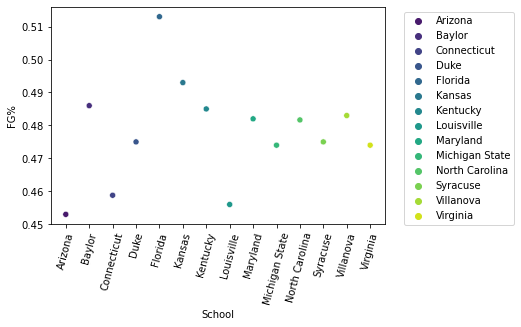

In [26]:
ax = sns.scatterplot(data=SR_NCAA_Wins_Combined, x='School', y='FG%', hue='School', palette='viridis')

plt.legend(bbox_to_anchor=(1.4,1), loc='upper right')
plt.xticks(rotation=75)

plt.show()

Text(0, 0.5, 'School')

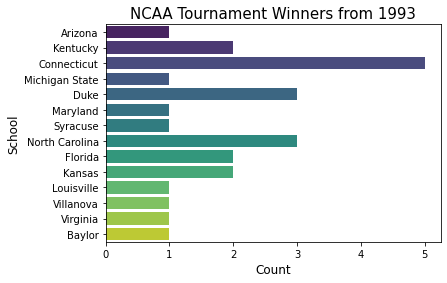

In [321]:
ax = sns.countplot(data=SR_NCAA_Wins, y='School', palette='viridis')

ax.set_title('NCAA Tournament Winners from 1993', fontsize=15)

ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('School', fontsize=12)

### Distribution of Field Goal Percentage for Winning and Losing Teams

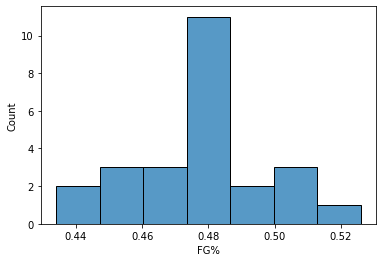

In [169]:
# WINNING TEAMS
ax = sns.histplot(data=SR_NCAA_Wins, x='FG%')

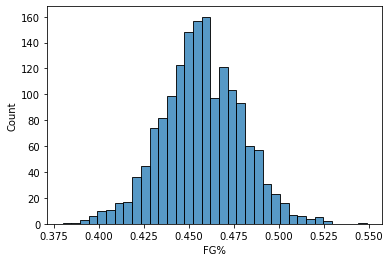

In [170]:
# LOSING TEAMS
ax = sns.histplot(data=SR_NCAA_Losses, x='FG%')

## FGA for Purple Teams and Blue Bloods

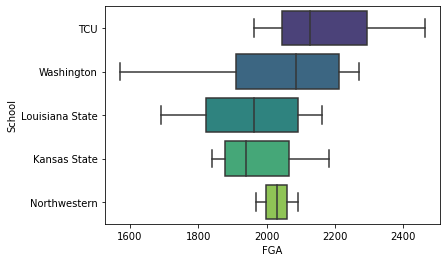

In [151]:
ax = sns.boxplot(data=PT_NCAA, x='FGA', y='School', palette='viridis')

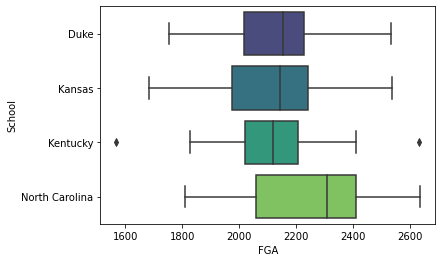

In [149]:
ax = sns.boxplot(data=BB_NCAA, x='FGA', y='School', palette='viridis')

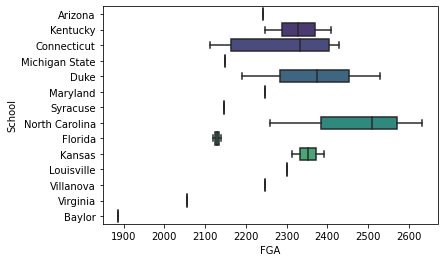

In [150]:
ax = sns.boxplot(data=SR_NCAA_Wins, x='FGA', y='School', palette='viridis')

plt.show()

### Distribution of FG for Winning and Losing Teams

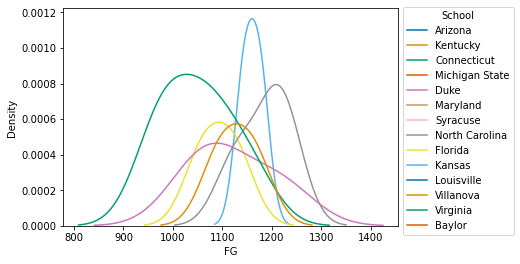

In [259]:
ax = sns.kdeplot(data=SR_NCAA_Wins, x='FG', hue='School', palette = 'colorblind', warn_singular=False)

sns.move_legend(ax, "upper left", bbox_to_anchor=(1,1.03))

plt.show()

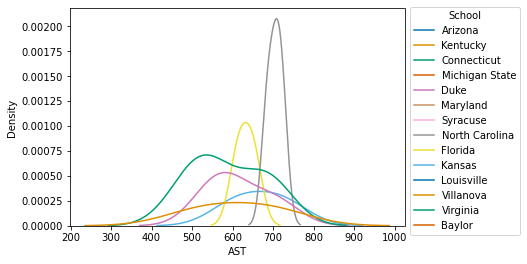

In [261]:
ax = sns.kdeplot(data=SR_NCAA_Wins, x='AST', hue='School', palette = 'colorblind', warn_singular=False)

sns.move_legend(ax, "upper left", bbox_to_anchor=(1,1.03))

plt.show()

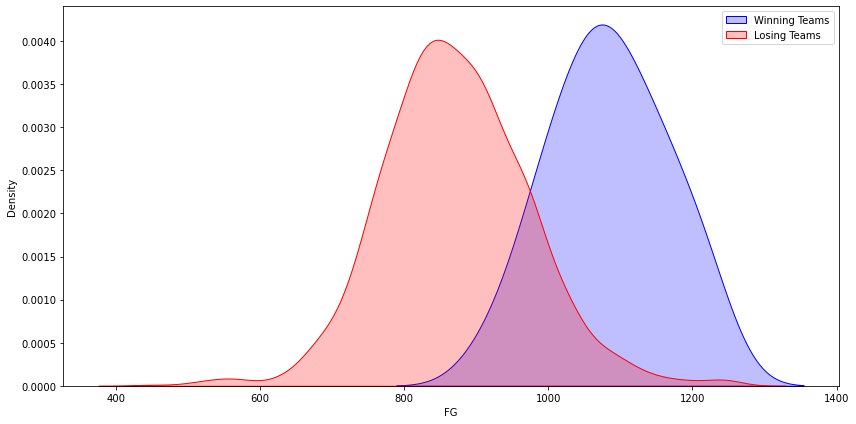

In [238]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.kdeplot(data=SR_NCAA_Wins, x='FG', color='blue', label='Winning Teams', fill=True, ax=ax)
sns.kdeplot(data=SR_NCAA_Losses, x='FG', color='red', label='Losing Teams', fill=True, ax=ax)

ax.legend()
plt.tight_layout()
plt.show()

### Distribution of FGA for Winning and Losing Teams

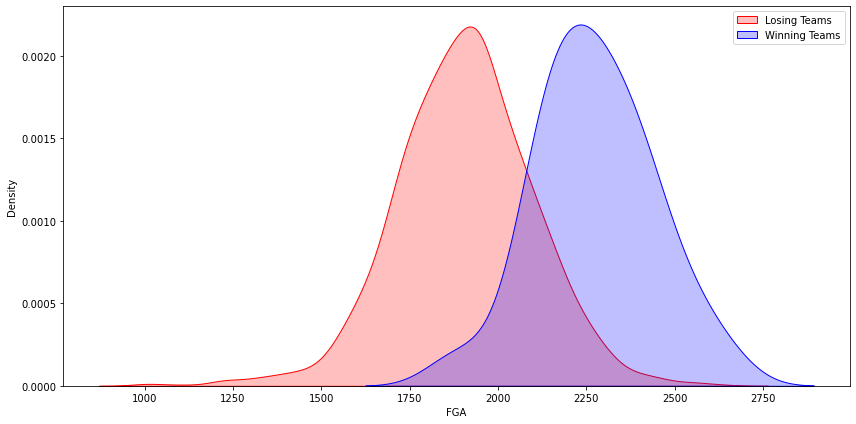

In [242]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.kdeplot(data=SR_NCAA_Losses, x='FGA', color='red', label='Losing Teams', fill=True, ax=ax)
sns.kdeplot(data=SR_NCAA_Wins, x='FGA', color='blue', label='Winning Teams', fill=True, ax=ax)

ax.legend()
plt.tight_layout()
plt.show()

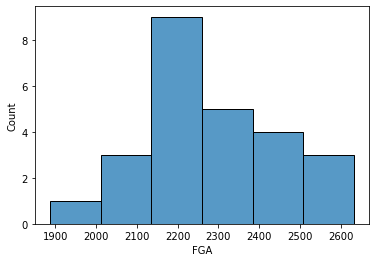

In [147]:
# WINING TEAMS
ax = sns.histplot(data=SR_NCAA_Wins, x='FGA')

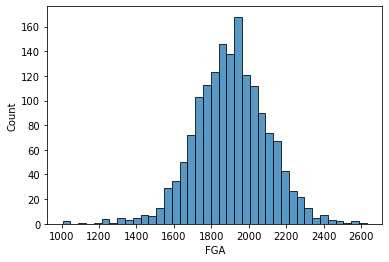

In [145]:
# LOSING TEAMS
ax = sns.histplot(data=SR_NCAA_Losses, x='FGA')

### Distribution of Total Rebounds for Winning and Losing Teams

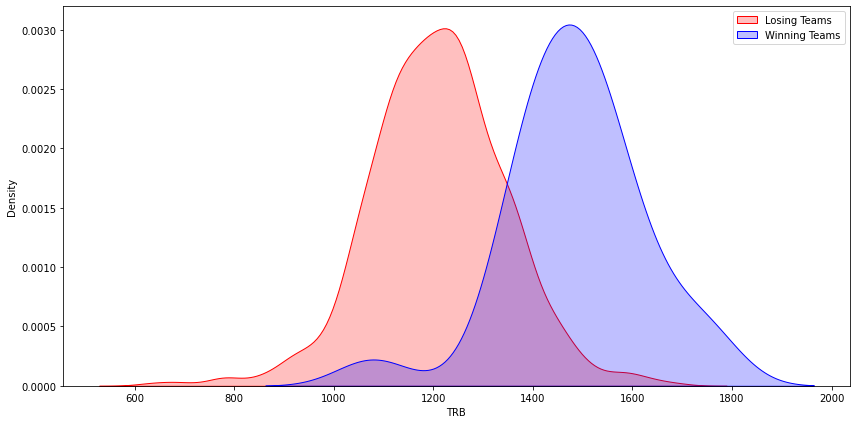

In [249]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.kdeplot(data=SR_NCAA_Losses, x='TRB', color='red', label='Losing Teams', fill=True, ax=ax)
sns.kdeplot(data=SR_NCAA_Wins, x='TRB', color='blue', label='Winning Teams', fill=True, ax=ax)

ax.legend()
plt.tight_layout()
plt.show()

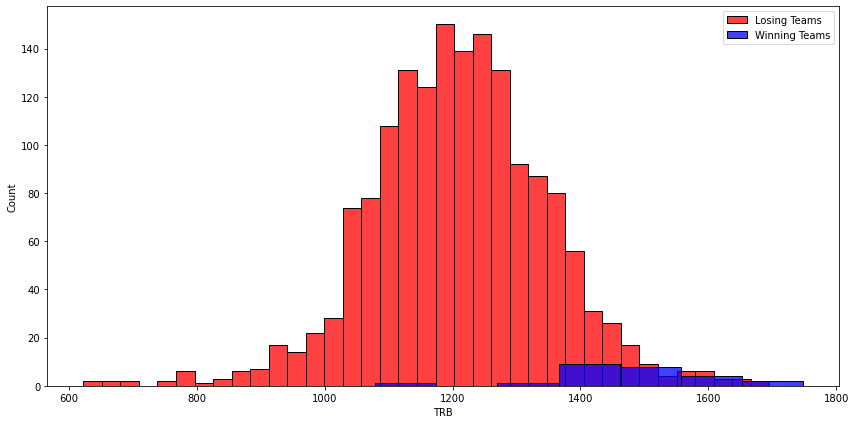

In [245]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.histplot(data=SR_NCAA_Losses, x='TRB', color='red', label='Losing Teams', fill=True, ax=ax)
sns.histplot(data=SR_NCAA_Wins, x='TRB', color='blue', label='Winning Teams', fill=True, ax=ax)

ax.legend()
plt.tight_layout()
plt.show()

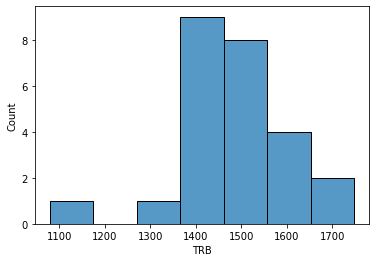

In [164]:
# WINING TEAMS
ax = sns.histplot(data=SR_NCAA_Wins, x='TRB')

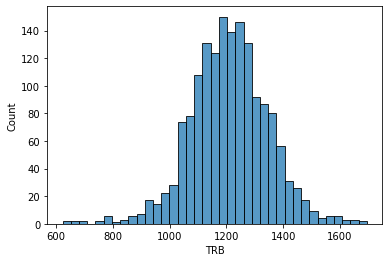

In [165]:
# LOSING TEAMS
ax = sns.histplot(data=SR_NCAA_Losses, x='TRB')

### Distribution of Total Assists for Winning and Losing Teams

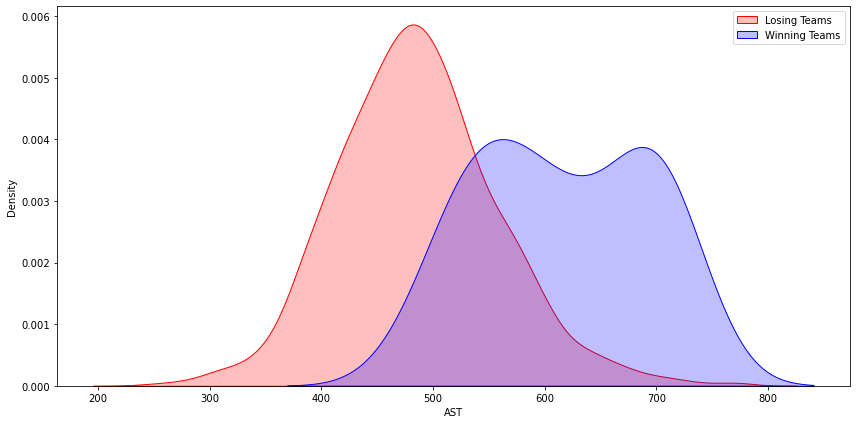

In [253]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.kdeplot(data=SR_NCAA_Losses, x='AST', color='red', label='Losing Teams', fill=True, ax=ax)
sns.kdeplot(data=SR_NCAA_Wins, x='AST', color='blue', label='Winning Teams', fill=True, ax=ax)

ax.legend()
plt.tight_layout()
plt.show()

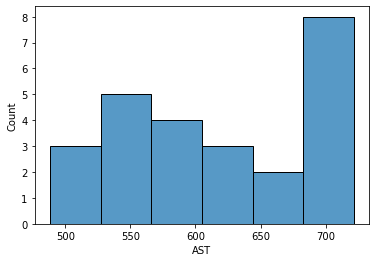

In [167]:
# WINING TEAMS
ax = sns.histplot(data=SR_NCAA_Wins, x='AST')

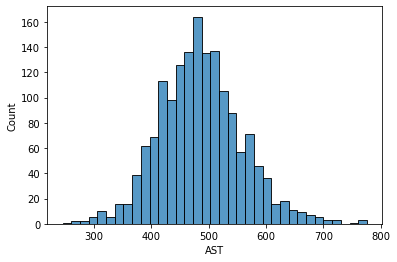

In [168]:
# LOSING TEAMS
ax = sns.histplot(data=SR_NCAA_Losses, x='AST')

## Conducting the Shapiro-Wilk Test

In [42]:
SR_NCAA_Cleaned = SR_NCAA.drop('School', axis=1)

In [43]:
Shapiro_Result = shapiro(SR_NCAA_Cleaned)

In [44]:
print(Shapiro_Result)

ShapiroResult(statistic=0.6815710067749023, pvalue=0.0)


The results of the Shapiro-Wilk test pvalue is 0.0, which is less than 0.05. As such, this indicates that the data is not normally distributed. The data for the Teams that have qualified for the NCAA tournament in the last 30 years is not normally distributed.

In [35]:
SR_NCAA_Cleaned.shape

(1640, 32)

## Conducting the Kruskal-Wallis Test

Kruskal-Wallis test is performed on data with a non-normal distribution. The Shapiro-Wilk test returned a p-value less than 0.05 which indicated the null hypothesis could be rejected and the data should be treated as non-normal.

In [211]:
kruskal(SR_NCAA_Wins_Combined, SR_NCAA_Losses_Combined)

KruskalResult(statistic=1001727.6867219183, pvalue=0.0)

In [216]:
stat, pval = kruskal(SR_NCAA_Wins_Combined, SR_NCAA_Losses_Combined)

In [217]:
print("p-value: {:.3f}".format(pval))

p-value: 0.000


The p-value for the Kruskal-Wallis test was equal to 0.0, less than 0.05. As such, I will reject the null hypothesis that there is no statistical difference between teams that win the NCAA and teams that do not win.

In [219]:
SR_NCAA_Wins_drop = SR_NCAA_Wins.drop(['School'], axis=1, inplace=False)

In [220]:
SR_NCAA_Losses_drop = SR_NCAA_Losses.drop(['School'], axis=1, inplace=False)

In [221]:
kruskal(SR_NCAA_Wins_drop, SR_NCAA_Losses_drop)

KruskalResult(statistic=5227252.598443241, pvalue=0.0)

In [222]:
stat1, pval1 = kruskal(SR_NCAA_Wins_drop, SR_NCAA_Losses_drop)

In [223]:
print("p-value: {:.3f}".format(pval1))

p-value: 0.000


## Creating a Correlation Matrix

In [45]:
corr = SR.corr()

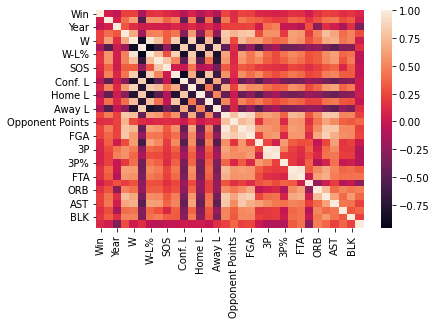

In [225]:
sns.heatmap(SR.corr(), annot=False)
plt.show()

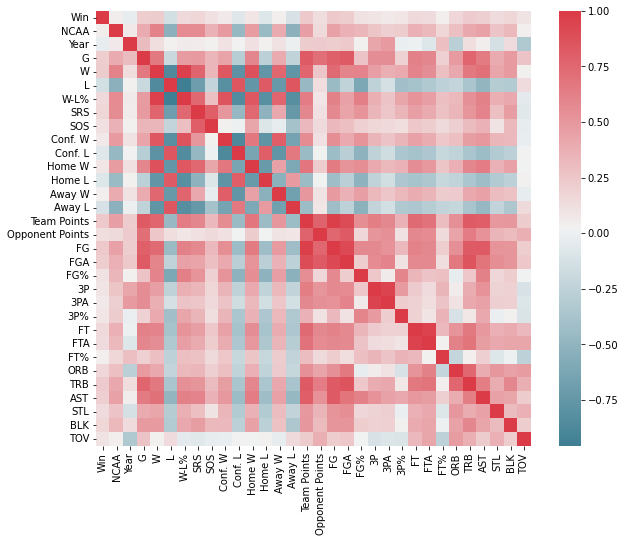

In [332]:
f, ax = plt.subplots(figsize=(10,8))

sns.heatmap(SR.corr(), mask=np.zeros_like(corr, dtype=bool),
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

plt.show()

In [47]:
corr.style.background_gradient(cmap='coolwarm')

,Win,NCAA,Year,G,W,L,W-L%,SRS,SOS,Conf. W,Conf. L,Home W,Home L,Away W,Away L,Team Points,Opponent Points,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,TRB,AST,STL,BLK,TOV
Win,1.000000,0.049098,-0.029620,0.217286,0.221939,-0.145594,0.157194,0.174615,0.116785,0.071986,-0.075383,0.087097,-0.080019,0.041654,-0.111985,0.240813,0.135189,0.237866,0.217452,0.110386,0.098044,0.070510,0.089572,0.157994,0.143198,0.041202,0.165964,0.230984,0.207000,0.137278,0.174348,0.105790
NCAA,0.049098,1.000000,0.068214,0.402959,0.612598,-0.528143,0.569500,0.560702,0.362959,0.487028,-0.468051,0.479366,-0.459148,0.397852,-0.520991,0.462387,0.149608,0.450257,0.370538,0.335572,0.260171,0.206768,0.227890,0.366528,0.333730,0.169711,0.289500,0.418219,0.447791,0.271821,0.334498,0.042012
Year,-0.029620,0.068214,1.000000,0.310167,0.132409,0.036027,0.062285,0.054491,0.035394,0.108686,0.027409,0.118220,0.035254,0.106330,-0.008524,0.224623,0.231260,0.215903,0.242187,0.031759,0.425075,0.483477,-0.009391,0.002118,-0.083913,0.285611,-0.272874,0.133546,0.051482,-0.135095,0.138966,-0.329952
G,0.217286,0.402959,0.310167,1.000000,0.658178,-0.185353,0.473828,0.489902,0.337744,0.434885,-0.284420,0.592270,-0.261699,0.398460,-0.245336,0.824798,0.709762,0.794419,0.823692,0.268318,0.554494,0.555901,0.194519,0.621845,0.593503,0.199064,0.490583,0.768895,0.650853,0.397450,0.494893,0.273914
W,0.221939,0.612598,0.132409,0.658178,1.000000,-0.861805,0.967574,0.772618,0.342643,0.840050,-0.792508,0.870344,-0.759474,0.755686,-0.772468,0.768071,0.257868,0.741999,0.598087,0.604274,0.464854,0.377135,0.408243,0.604967,0.549794,0.295658,0.415191,0.663024,0.702706,0.426888,0.488400,0.030903
L,-0.145594,-0.528143,0.036027,-0.185353,-0.861805,1.000000,-0.956347,-0.691002,-0.227498,-0.816159,0.851947,-0.752765,0.822480,-0.729214,0.850498,-0.467012,0.125008,-0.452743,-0.245546,-0.615264,-0.246725,-0.131134,-0.407063,-0.385961,-0.332271,-0.256957,-0.226757,-0.366103,-0.494844,-0.299267,-0.316292,0.137930
W-L%,0.157194,0.569500,0.062285,0.473828,0.967574,-0.956347,1.000000,0.755118,0.287067,0.860220,-0.849020,0.846117,-0.816156,0.770276,-0.826086,0.646222,0.083773,0.623255,0.445288,0.633157,0.376509,0.273782,0.424004,0.520949,0.464092,0.293051,0.332708,0.538276,0.620484,0.375602,0.414939,-0.050981
SRS,0.174615,0.560702,0.054491,0.489902,0.772618,-0.691002,0.755118,1.000000,0.808167,0.508858,-0.473216,0.751632,-0.512183,0.415728,-0.742001,0.591362,0.114047,0.578419,0.441491,0.521221,0.337804,0.257953,0.346355,0.458459,0.400282,0.276638,0.336078,0.515621,0.609851,0.290611,0.466136,-0.068970
SOS,0.116785,0.362959,0.035394,0.337744,0.342643,-0.227498,0.287067,0.808167,1.000000,0.034367,0.003043,0.419820,-0.089314,-0.031322,-0.397683,0.324321,0.150497,0.320848,0.285146,0.198378,0.173684,0.152333,0.121863,0.248899,0.214644,0.151044,0.210367,0.307822,0.359604,0.100236,0.333262,-0.028754
Conf. W,0.071986,0.487028,0.108686,0.434885,0.840050,-0.816159,0.860220,0.508858,0.034367,1.000000,-0.873384,0.676293,-0.775220,0.802617,-0.648413,0.563958,0.115167,0.542910,0.404070,0.518718,0.348303,0.268055,0.348846,0.443128,0.395006,0.245965,0.283776,0.465900,0.501130,0.339103,0.324067,-0.023264


## Performing a Chi-Square Test for Feature Selection

In [101]:
Target = SR_NCAA['Win']

In [102]:
Features = SR_NCAA.drop(['Win', 'NCAA', 'School', 'Year'], axis=1, inplace=False)

In [103]:
chi_scores = chi2(Features, Target)

In [104]:
chi_scores

(array([1.73918685e+01, 8.73737545e+01, 5.03804549e+01, 7.97298097e-01,
        3.51083342e+00, 9.18612336e+00, 5.25271242e+00, 1.15179506e+01,
        1.11792297e+00, 2.24600529e+01, 3.29462725e+03, 8.47637294e+02,
        1.27503197e+03, 1.74650195e+03, 2.18234480e-02, 2.18335011e+02,
        3.06692372e+02, 2.35978626e-02, 5.46240111e+02, 6.02658492e+02,
        7.55963865e-03, 6.33808847e+02, 1.53730094e+03, 8.52548980e+02,
        3.41963789e+02, 6.78710114e+02, 1.55181307e+02]),
 array([3.04124284e-005, 8.98346930e-021, 1.26649321e-012, 3.71902424e-001,
        6.09687783e-002, 2.43856821e-003, 2.19125877e-002, 6.89273382e-004,
        2.90366132e-001, 2.14559591e-006, 0.00000000e+000, 2.37259921e-186,
        3.01415032e-279, 0.00000000e+000, 8.82557738e-001, 2.08721078e-049,
        1.14757625e-068, 8.77912553e-001, 8.27797110e-121, 4.42138220e-133,
        9.30714290e-001, 7.42054618e-140, 0.00000000e+000, 2.02961519e-187,
        2.38339453e-076, 1.27476950e-149, 1.27812332e-

In [182]:
test = SelectKBest(score_func=chi2, k=10)

In [184]:
fit = test.fit(Features, Target)

In [185]:
SelectedFeatures = Features.columns[test.get_support()]

In [186]:
print(SelectedFeatures)

Index(['Team Points', 'Opponent Points', 'FG', 'FGA', 'FT', 'FTA', 'ORB',
       'TRB', 'AST', 'BLK'],
      dtype='object')


In [333]:
p_values = pd.Series(chi_scores[1], index=Features.columns)
p_values.sort_values(ascending = False, inplace=True)

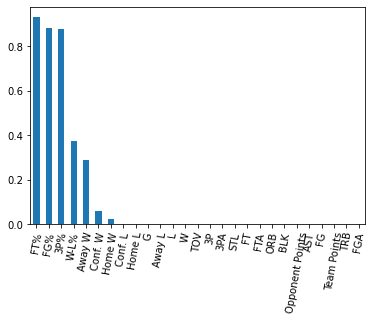

In [334]:
p_values.plot.bar()
plt.xticks(rotation=80)

plt.show()

## Creating a Model - Logistic Regression

In [340]:
scaler = StandardScaler()

In [341]:
Target = SR_NCAA['Win']

In [342]:
Features = SR_NCAA.drop(['Win', 'NCAA', 'School', 'Year'], axis=1, inplace=False)

In [343]:
Features_Train, Features_Test, Target_Train, Target_Test = train_test_split(Features, Target, test_size=0.3)

In [344]:
model = LogisticRegression()

In [345]:
Features_Train = scaler.fit_transform(Features_Train)
Features_Test = scaler.transform(Features_Test)

In [346]:
ModelLR = model.fit(Features_Train, Target_Train)

In [347]:
Target_Predicted = model.fit(Features_Train, Target_Train).predict(Features_Test)

In [369]:
accuracy = accuracy_score(Target_Test, Target_Predicted, normalize=True)

Accuracy_Percentage = accuracy*100

print('Model Accuracy: ', round(Accuracy_Percentage, 2), '%', sep="")

Model Accuracy: 98.17%


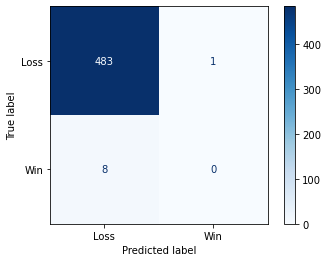

In [367]:
cm = confusion_matrix(Target_Test, Target_Predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Loss', 'Win'])

cm_display.plot(cmap='Blues')
plt.grid(False)
plt.show()

In [368]:
print(classification_report(Target_Test,Target_Predicted))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       484
         1.0       0.00      0.00      0.00         8

    accuracy                           0.98       492
   macro avg       0.49      0.50      0.50       492
weighted avg       0.97      0.98      0.97       492



In [351]:
Target_predict_proba = model.predict_proba(Features_Test)[:,1]

In [352]:
fpr, tpr, thresholds = roc_curve(Target_Test, Target_predict_proba)

In [353]:
roc_auc = auc(fpr, tpr)

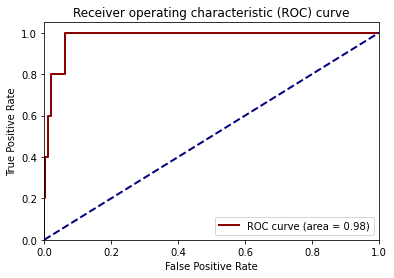

In [356]:
plt.figure()
plt.plot(fpr, tpr, color='darkred', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

#### Model with Features with a P-Value Higher than 0.05 Removed

In [370]:
Features2 = SR_NCAA.drop(['School', 'Year', 'NCAA', 'Win', 'FT%', 'FG%', '3P%', 'W-L%', 'Away W', 'Conf. W', 'Home W', 'Conf. L'], axis=1, inplace=False)

In [371]:
Features_Train2, Features_Test2, Target_Train, Target_Test = train_test_split(Features2, Target, test_size=0.3)

In [372]:
Features_Train2 = scaler.fit_transform(Features_Train2)
Features_Test2 = scaler.transform(Features_Test2)

In [373]:
ModelLR2 = model.fit(Features_Train2, Target_Train)

In [374]:
Target_Predicted2 = model.fit(Features_Train2, Target_Train).predict(Features_Test2)

In [375]:
accuracy2 = accuracy_score(Target_Test, Target_Predicted2, normalize=True)

Accuracy_Percentage = accuracy*100

print('Accuracy: ', round(Accuracy_Percentage, 2), '%', sep="")

Accuracy: 98.17%


In [376]:
print(classification_report(Target_Test,Target_Predicted2))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       481
         1.0       0.50      0.18      0.27        11

    accuracy                           0.98       492
   macro avg       0.74      0.59      0.63       492
weighted avg       0.97      0.98      0.97       492



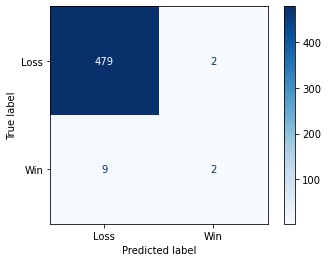

In [377]:
cm = confusion_matrix(Target_Test, Target_Predicted2)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Loss', 'Win'])

cm_display.plot(cmap='Blues')
plt.grid(False)
plt.show()

### Logistic Regression Model with Selected Features

In [359]:
Features3 = SR_NCAA[['FGA', 'TRB', 'FG', 'AST']]

In [360]:
Features_Train3, Features_Test3, Target_Train, Target_Test = train_test_split(Features2, Target, test_size=0.3)

In [361]:
Features_Train3 = scaler.fit_transform(Features_Train3)
Features_Test3 = scaler.transform(Features_Test3)

In [362]:
ModelLR3 = model.fit(Features_Train3, Target_Train)

In [363]:
Target_Predicted3 = model.fit(Features_Train3, Target_Train).predict(Features_Test3)

In [364]:
accuracy3 = accuracy_score(Target_Test, Target_Predicted3, normalize=True)

Accuracy_Percentage = accuracy*100

print('Accuracy: ', round(Accuracy_Percentage, 2), '%', sep="")

Accuracy: 99.19%


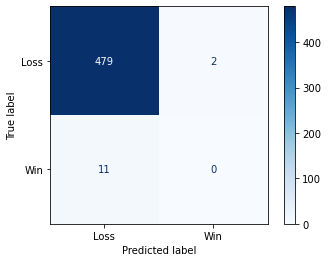

In [380]:
cm = confusion_matrix(Target_Test, Target_Predicted3)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Loss', 'Win'])

cm_display.plot(cmap='Blues')
plt.grid(False)
plt.show()

In [381]:
print(classification_report(Target_Test,Target_Predicted3))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       481
         1.0       0.00      0.00      0.00        11

    accuracy                           0.97       492
   macro avg       0.49      0.50      0.49       492
weighted avg       0.96      0.97      0.96       492

